
📊 Đang phân tích: Chế độ Đãi ngộ & Lương thưởng (Phan_Loai_Dai_Ngo.csv)...


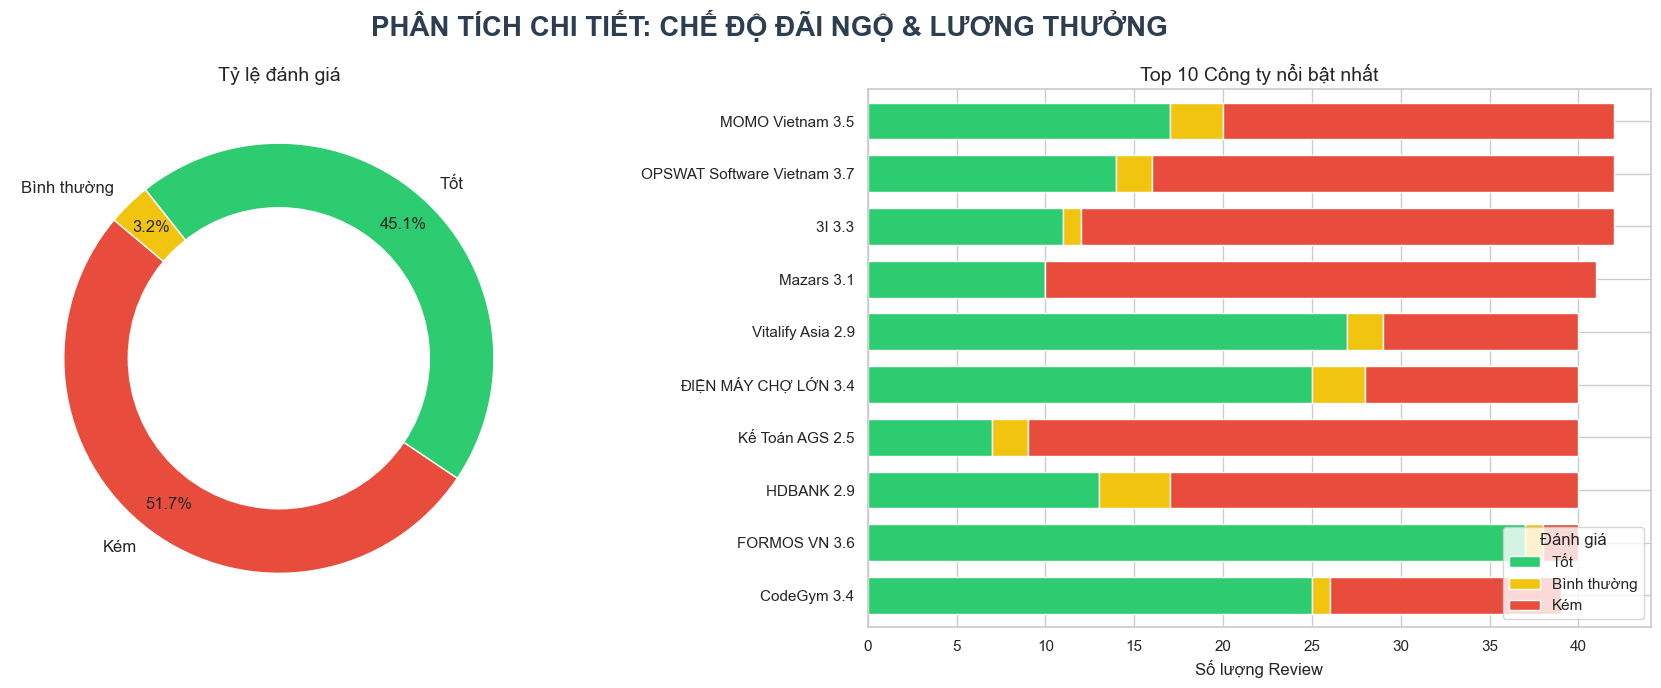


📊 Đang phân tích: Văn hóa Công ty (Phan_Loai_Van_Hoa.csv)...


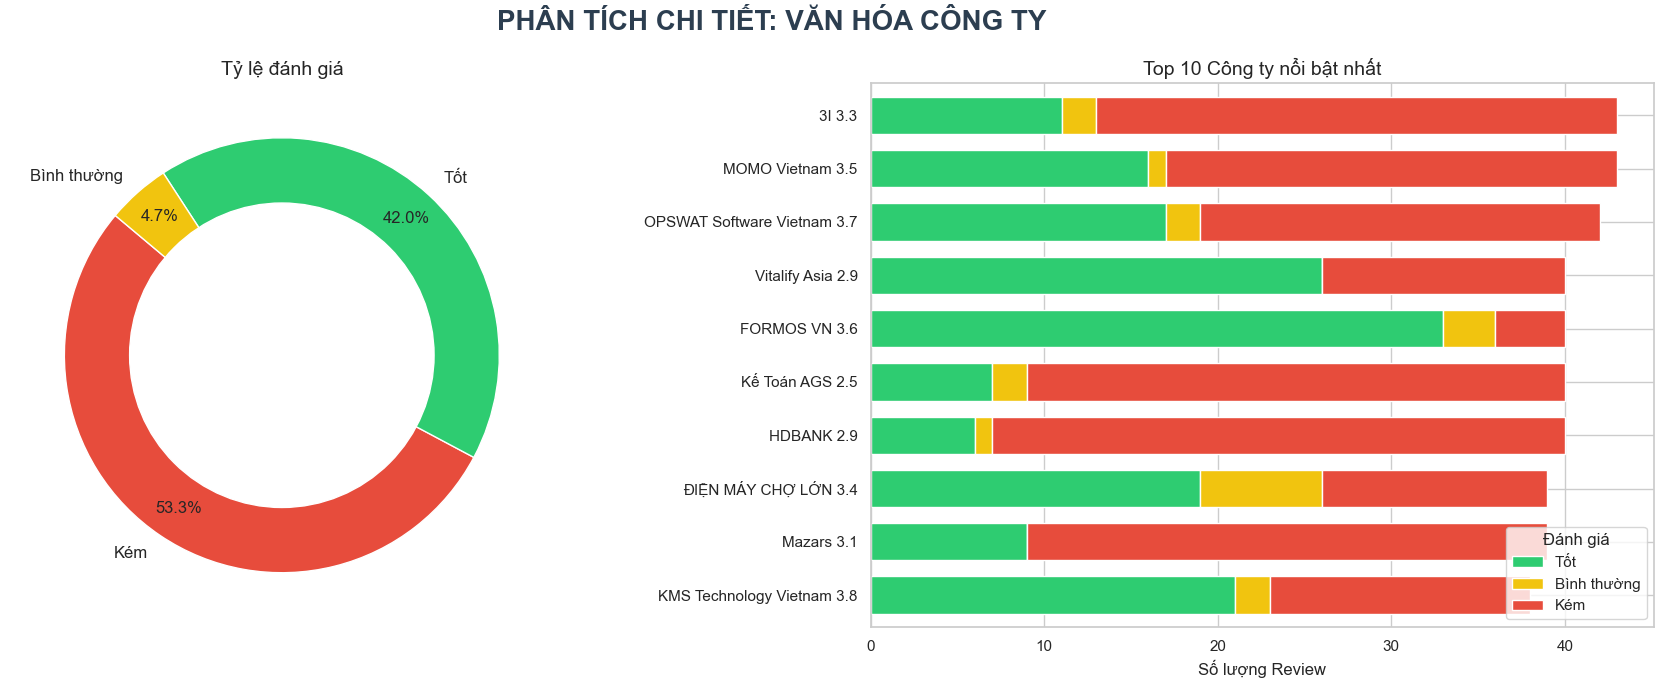


📊 Đang phân tích: Ban Lãnh đạo & Quản lý (Phan_Loai_Lanh_Dao.csv)...


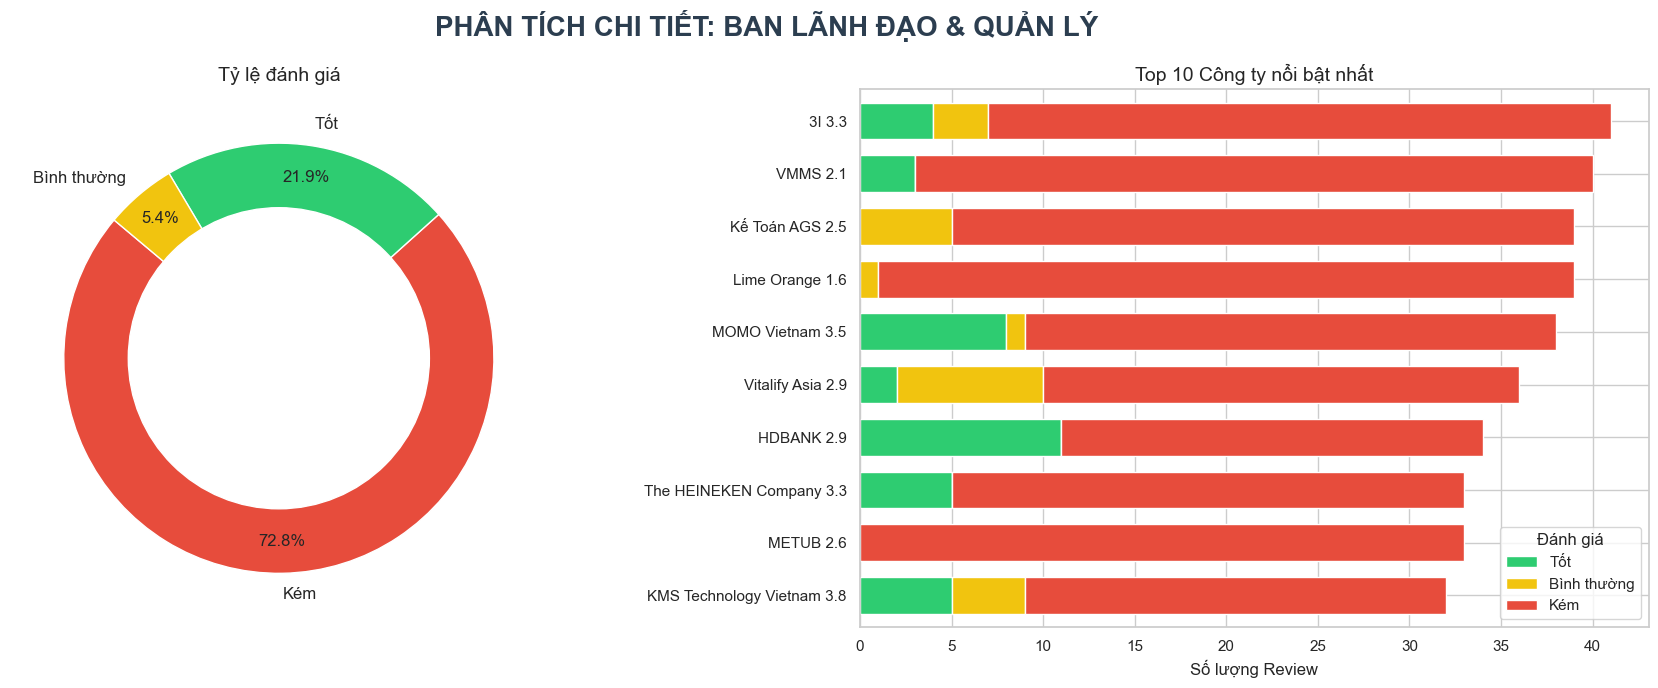


📊 Đang phân tích: Cơ hội Phát triển & Đào tạo (Phan_Loai_Phat_Trien.csv)...


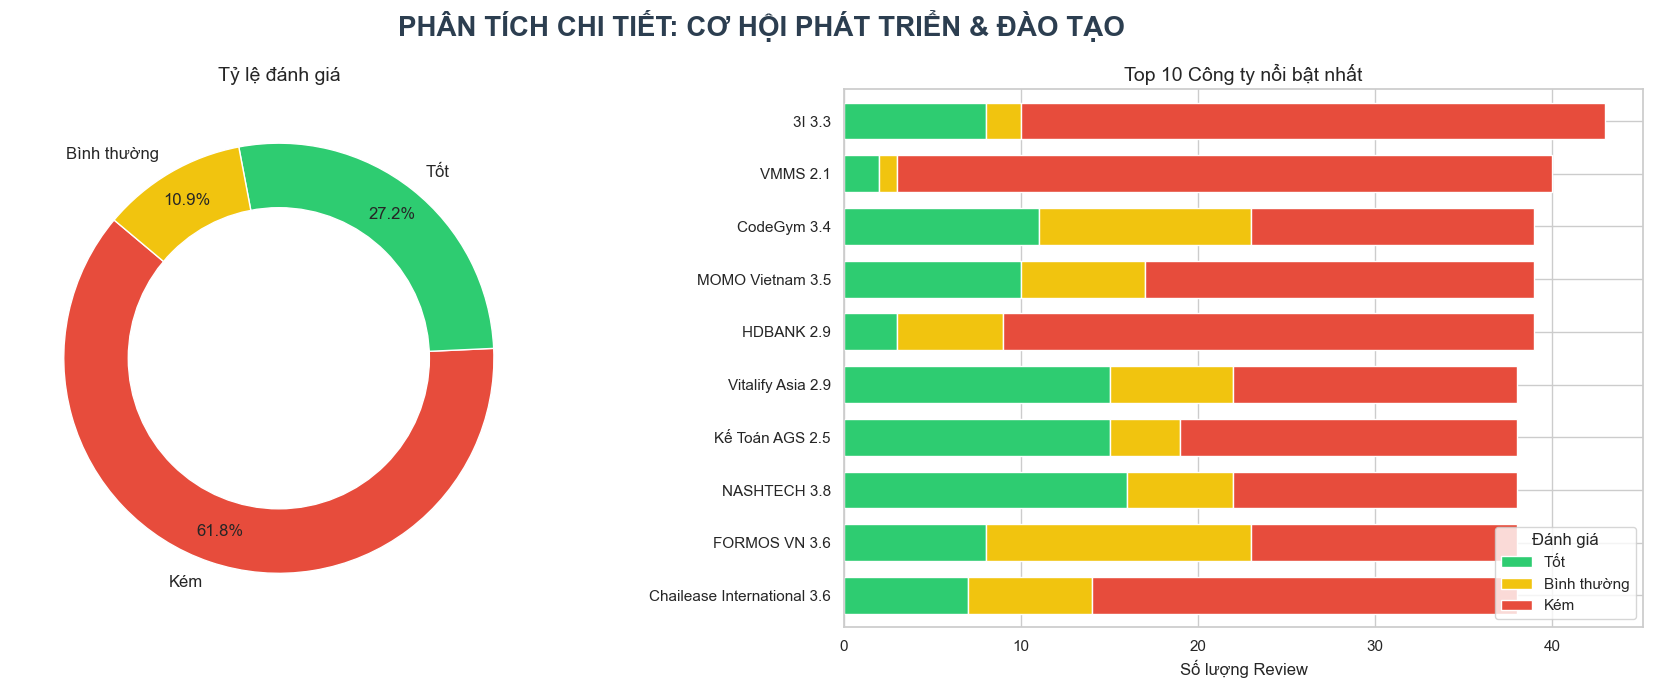


📊 Đang vẽ biểu đồ TỔNG HỢP toàn bộ...


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\3968583293.py:146: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontweight='bold')


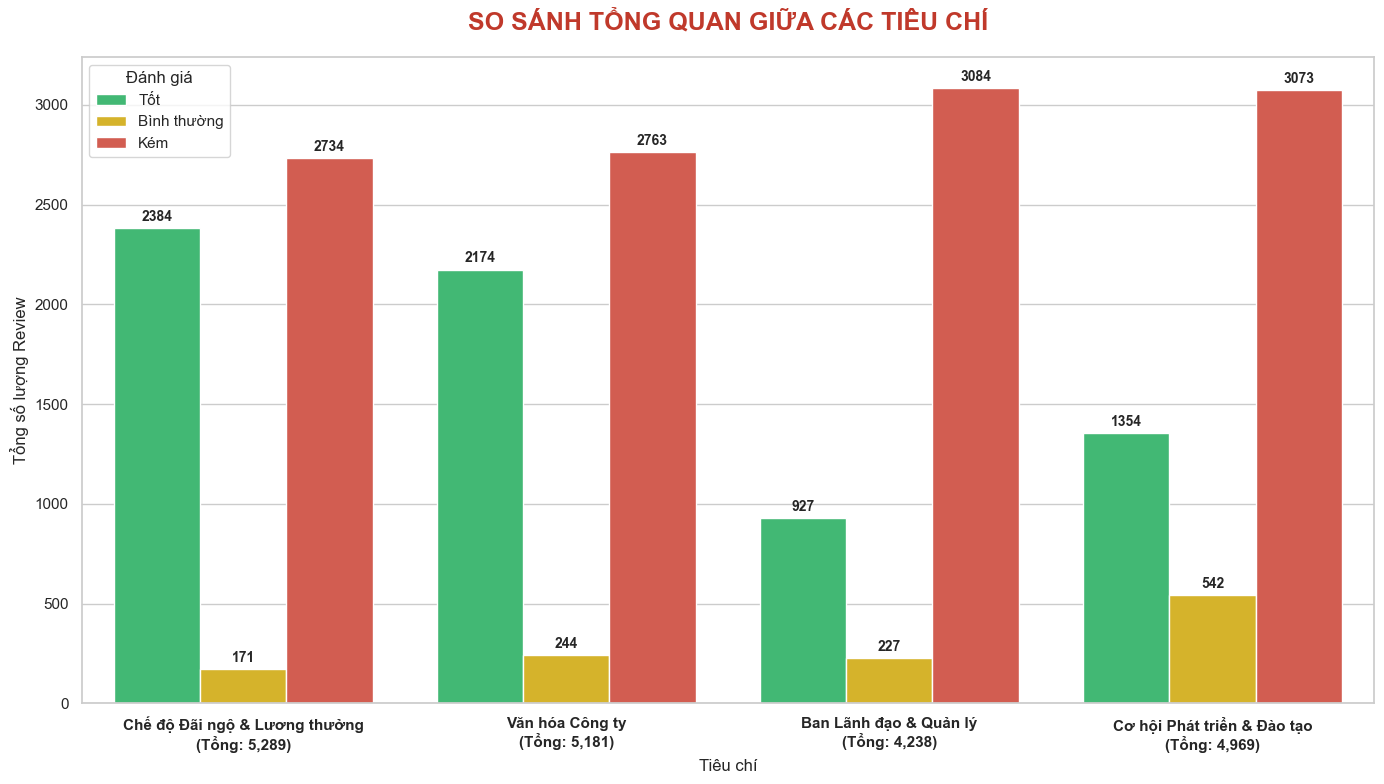


 HOÀN TẤT TOÀN BỘ QUÁ TRÌNH TRỰC QUAN HÓA!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- CẤU HÌNH ---
# Danh sách 4 loại file cần vẽ
categories = {
    'Dai_Ngo': 'Chế độ Đãi ngộ & Lương thưởng',
    'Van_Hoa': 'Văn hóa Công ty',
    'Lanh_Dao': 'Ban Lãnh đạo & Quản lý',
    'Phat_Trien': 'Cơ hội Phát triển & Đào tạo'
}

# Màu sắc chuẩn: Tốt=Xanh, Bình thường=Vàng, Kém=Đỏ
color_map = {
    'Tốt': '#2ecc71',       # Xanh lá
    'Bình thường': '#f1c40f', # Vàng
    'Kém': '#e74c3c',       # Đỏ
    'N/A': '#95a5a6'        # Xám
}

# Thư mục chứa 4 file phân loại (Nếu để chung chỗ với code thì để dấu chấm .)
input_folder = "." 

# Biến toàn cục để lưu trữ dữ liệu tổng hợp
global_summary_data = []

# --- HÀM VẼ BIỂU ĐỒ CHO TỪNG FILE ---
def visualize_category(cat_key, cat_name):
    filename = f"Phan_Loai_{cat_key}.csv"
    file_path = os.path.join(input_folder, filename)
    
    if not os.path.exists(file_path):
        print(f"⚠️ Không tìm thấy file: {filename} -> Bỏ qua.")
        return

    print(f"\n📊 Đang phân tích: {cat_name} ({filename})...")
    
    # Đọc dữ liệu
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
    except:
        df = pd.read_csv(file_path, encoding='utf-8')

    # Chuẩn hóa dữ liệu cột đánh giá (Xóa khoảng trắng thừa)
    df[cat_key] = df[cat_key].astype(str).str.strip()
    
    # Chỉ giữ lại các giá trị hợp lệ để vẽ cho đẹp
    valid_labels = ['Tốt', 'Bình thường', 'Kém']
    df = df[df[cat_key].isin(valid_labels)]

    if len(df) == 0:
        print("   -> Không có dữ liệu hợp lệ để vẽ.")
        return

    # --- LƯU DỮ LIỆU ĐỂ VẼ BIỂU ĐỒ TỔNG KẾT SAU NÀY ---
    counts = df[cat_key].value_counts()
    for label in valid_labels:
        global_summary_data.append({
            'Category': cat_name,       # Tên danh mục (Đãi ngộ, Văn hóa...)
            'Sentiment': label,         # Tốt/Xấu
            'Count': counts.get(label, 0) # Số lượng
        })

    # --- TẠO KHUNG VẼ (2 biểu đồ cạnh nhau) ---
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    fig.suptitle(f'PHÂN TÍCH CHI TIẾT: {cat_name.upper()}', fontsize=20, color='#2c3e50', weight='bold')

    # --- BIỂU ĐỒ 1: TỔNG QUAN TỶ LỆ (DONUT CHART) ---
    sentiment_counts = df[cat_key].value_counts()
    
    # Lấy màu tương ứng
    colors = [color_map.get(label, '#333333') for label in sentiment_counts.index]
    
    axes[0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', 
                startangle=140, colors=colors, textprops={'fontsize': 12}, pctdistance=0.85)
    
    # Vẽ vòng tròn trắng ở giữa để tạo hiệu ứng Donut
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axes[0].add_artist(centre_circle)
    axes[0].set_title(f'Tỷ lệ đánh giá', fontsize=14)

    # --- BIỂU ĐỒ 2: TOP 10 CÔNG TY (STACKED BAR) ---
    # Lấy Top 10 công ty có nhiều review nhất trong hạng mục này
    top_companies = df['Ten_Cong_Ty'].value_counts().head(10).index
    df_top = df[df['Ten_Cong_Ty'].isin(top_companies)]
    
    # Tạo bảng chéo (Crosstab) để đếm số lượng Tốt/Kém cho từng cty
    cross_tab = pd.crosstab(df_top['Ten_Cong_Ty'], df_top[cat_key])
    
    # Sắp xếp lại thứ tự cột cho đúng logic: Tốt -> Bình thường -> Kém
    cols_order = [c for c in ['Tốt', 'Bình thường', 'Kém'] if c in cross_tab.columns]
    cross_tab = cross_tab[cols_order]
    
    # Sắp xếp công ty theo tổng số review
    cross_tab['Total'] = cross_tab.sum(axis=1)
    cross_tab = cross_tab.sort_values('Total', ascending=True) # Ascending để vẽ barh từ dưới lên
    cross_tab = cross_tab.drop(columns=['Total'])

    # Vẽ biểu đồ cột chồng ngang
    my_colors = [color_map[c] for c in cross_tab.columns]
    cross_tab.plot(kind='barh', stacked=True, ax=axes[1], color=my_colors, width=0.7)
    
    axes[1].set_title('Top 10 Công ty nổi bật nhất', fontsize=14)
    axes[1].set_xlabel('Số lượng Review')
    axes[1].set_ylabel('')
    axes[1].legend(title='Đánh giá', loc='lower right')

    plt.tight_layout()
    plt.show()

# --- HÀM VẼ BIỂU ĐỒ TỔNG HỢP CUỐI CÙNG ---
def visualize_overall_summary():
    if not global_summary_data:
        print("❌ Không có dữ liệu tổng hợp để vẽ.")
        return

    print("\n📊 Đang vẽ biểu đồ TỔNG HỢP toàn bộ...")
    summary_df = pd.DataFrame(global_summary_data)

    plt.figure(figsize=(14, 8))
    
    # Vẽ biểu đồ cột nhóm (Grouped Bar Chart)
    ax = sns.barplot(data=summary_df, x='Category', y='Count', hue='Sentiment', 
                     palette=color_map, hue_order=['Tốt', 'Bình thường', 'Kém'])

    plt.title('SO SÁNH TỔNG QUAN GIỮA CÁC TIÊU CHÍ', fontsize=18, fontweight='bold', pad=20, color='#c0392b')
    plt.xlabel('Tiêu chí', fontsize=12)
    plt.ylabel('Tổng số lượng Review', fontsize=12)
    plt.legend(title='Đánh giá')

    # Thêm nhãn số liệu
    for container in ax.containers:
        ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

    # Thêm tổng số vào trục X
    total_counts = summary_df.groupby('Category')['Count'].sum()
    new_labels = []
    # Lấy thứ tự nhãn hiện tại của trục X để map đúng tổng số
    current_labels = [item.get_text() for item in ax.get_xticklabels()]
    for label in current_labels:
        total = total_counts.get(label, 0)
        new_labels.append(f"{label}\n(Tổng: {total:,})")
    
    ax.set_xticklabels(new_labels, fontweight='bold')

    plt.tight_layout()
    plt.show()

# --- CHẠY CHƯƠNG TRÌNH ---
# Thiết lập giao diện
sns.set(style="whitegrid")

# 1. Chạy vòng lặp vẽ chi tiết từng file
for key, name in categories.items():
    visualize_category(key, name)

# 2. Vẽ biểu đồ tổng kết cuối cùng
visualize_overall_summary()

print("\n HOÀN TẤT TOÀN BỘ QUÁ TRÌNH TRỰC QUAN HÓA!")